In [19]:
import cv2


In [20]:
import numpy as np

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
from sklearn.model_selection import train_test_split


In [23]:
from sklearn.metrics import accuracy_score

In [24]:
pip install geopy


Note: you may need to restart the kernel to use updated packages.


In [25]:
from geopy.geocoders import Nominatim

In [26]:
import matplotlib.pyplot as plt

In [27]:
# this process involves the loading and preprocessing of the image 
def load_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [28]:
def display_image(image, title='Image'):
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.title(title)
    plt.show()

In [29]:
def segment_image(image, k=5):
    pixel_values = image.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)

    # Define criteria, number of clusters (k) and apply k-means
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    
    centers = np.uint8(centers)
    segmented_image = centers[labels.flatten()]
    segmented_image = segmented_image.reshape(image.shape)
    
    return segmented_image, labels.reshape(image.shape[:2])


In [30]:
def train_classifier(features, labels):
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Classifier Accuracy: {accuracy * 100:.2f}%")
    
    return clf

In [31]:
def detect_landslides(image, classifier):
    features = image.reshape(-1, 3)  # Reshape image for prediction
    predictions = classifier.predict(features)
    prediction_image = predictions.reshape(image.shape[:2])
    
    return prediction_image

In [32]:
def map_coordinates(prediction_image):
    # Placeholder: Assuming each pixel corresponds to a fixed geographic region
    # In a real scenario, you'd map these to actual coordinates based on the image's georeferencing data.
    geolocator = Nominatim(user_agent="geoapiExercises")
    
    for y in range(prediction_image.shape[0]):
        for x in range(prediction_image.shape[1]):
            if prediction_image[y, x] == 1:  # Assuming 1 indicates landslide region
                latitude = 28.6139 + y * 0.0001  # Example latitude increment
                longitude = 77.2090 + x * 0.0001  # Example longitude increment
                location = geolocator.reverse(f"{latitude}, {longitude}")
                print(f"Landslide detected at: {location.address} (Latitude: {latitude}, Longitude: {longitude})")

In [33]:
def main(image_path):
    image = load_image(image_path)
    display_image(image, 'Original Image')
    
    segmented_image, labels = segment_image(image)
    display_image(segmented_image, 'Segmented Image')
    
    # Placeholder: Random sample data for training
    sample_features = labels.flatten().reshape(-1, 1)
    sample_labels = (labels.flatten() > 2).astype(int)  # Dummy labels (real labels needed)
    
    classifier = train_classifier(sample_features, sample_labels)
    prediction_image = detect_landslides(segmented_image, classifier)
    
    display_image(prediction_image, 'Landslide Prediction')
    
    map_coordinates(prediction_image)

In [43]:
geolocator = Nominatim(user_agent="your_custom_user_agent")


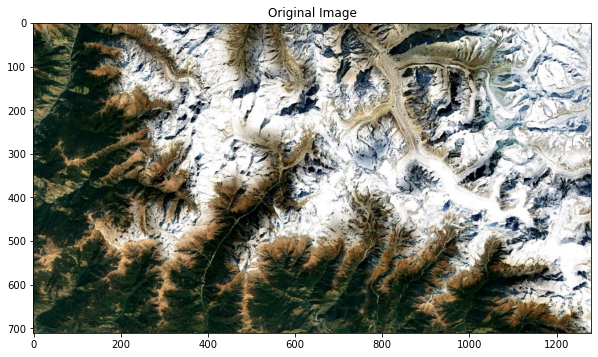

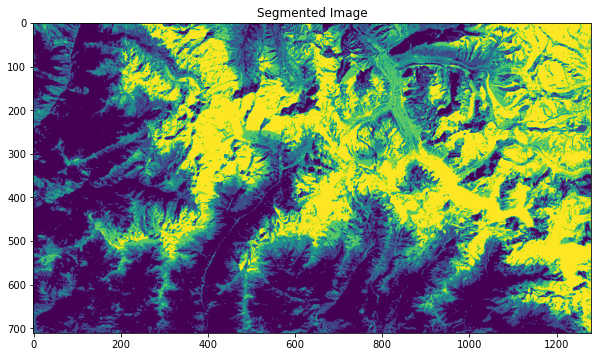

Classifier Accuracy: 100.00%


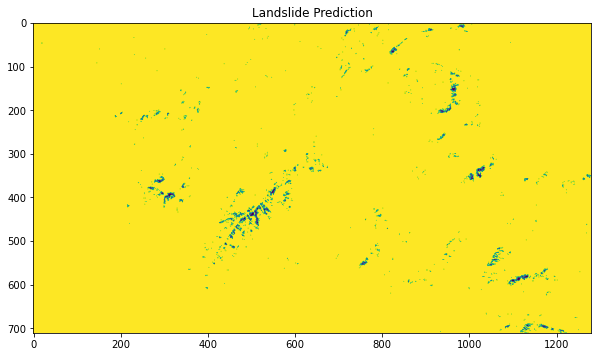

Landslide detected at: Vijay Chowk, Raisina Hill, Chanakya Puri Tehsil, New Delhi, Delhi, India (Latitude: 28.6139, Longitude: 77.209)
Landslide detected at: Vijay Chowk, Raisina Hill, Chanakya Puri Tehsil, New Delhi, Delhi, India (Latitude: 28.6139, Longitude: 77.2091)
Landslide detected at: Kartavya Path, Raisina Hill, Chanakya Puri Tehsil, New Delhi, Delhi, 110004, India (Latitude: 28.6139, Longitude: 77.20920000000001)
Landslide detected at: Kartavya Path, Raisina Hill, Chanakya Puri Tehsil, New Delhi, Delhi, 110004, India (Latitude: 28.6139, Longitude: 77.2093)
Landslide detected at: Kartavya Path, Raisina Hill, Chanakya Puri Tehsil, New Delhi, Delhi, 110004, India (Latitude: 28.6139, Longitude: 77.2094)
Landslide detected at: Kartavya Path, Raisina Hill, Chanakya Puri Tehsil, New Delhi, Delhi, 110004, India (Latitude: 28.6139, Longitude: 77.2095)
Landslide detected at: Kartavya Path, Raisina Hill, Chanakya Puri Tehsil, New Delhi, Delhi, 110004, India (Latitude: 28.6139, Longitude

KeyboardInterrupt: 

In [44]:
import cv2
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the image
def load_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def display_image(image, title='Image'):
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.title(title)
    plt.show()

# Step 2: Convert to grayscale and perform image segmentation using k-means clustering
def segment_image(image, k=5):
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    pixel_values = gray_image.reshape((-1, 1))
    pixel_values = np.float32(pixel_values)

    # Define criteria, number of clusters (k) and apply k-means
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    
    centers = np.uint8(centers)
    segmented_image = centers[labels.flatten()]
    segmented_image = segmented_image.reshape(gray_image.shape)
    
    return segmented_image, labels.reshape(gray_image.shape)

# Step 3: Train a Random Forest Classifier on sample data (this is a placeholder, real data is needed)
def train_classifier(features, labels):
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Classifier Accuracy: {accuracy * 100:.2f}%")
    
    return clf

# Step 4: Use the classifier to detect potential landslide regions
def detect_landslides(image, classifier):
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    features = gray_image.reshape(-1, 1)  # Reshape image for prediction (1D features)
    predictions = classifier.predict(features)
    prediction_image = predictions.reshape(image.shape[:2])
    
    return prediction_image

# Step 5: Map the segmented regions to geographic coordinates (placeholder, actual implementation needed)
def map_coordinates(prediction_image):
    geolocator = Nominatim(user_agent="geoapiExercises")
    
    for y in range(prediction_image.shape[0]):
        for x in range(prediction_image.shape[1]):
            if prediction_image[y, x] == 1:  # Assuming 1 indicates landslide region
                latitude = 28.6139 + y * 0.0001  # Example latitude increment
                longitude = 77.2090 + x * 0.0001  # Example longitude increment
                location = geolocator.reverse(f"{latitude}, {longitude}")
                print(f"Landslide detected at: {location.address} (Latitude: {latitude}, Longitude: {longitude})")

# Main function to run the detection process
def main(image_path):
    image = load_image(image_path)
    display_image(image, 'Original Image')
    
    segmented_image, labels = segment_image(image)
    display_image(segmented_image, 'Segmented Image')
    
    # Placeholder: Random sample data for training
    sample_features = labels.flatten().reshape(-1, 1)
    sample_labels = (labels.flatten() > 2).astype(int)  # Dummy labels (real labels needed)
    
    classifier = train_classifier(sample_features, sample_labels)
    prediction_image = detect_landslides(image, classifier)
    
    display_image(prediction_image, 'Landslide Prediction')
    
    map_coordinates(prediction_image)

# Run the main function with the input image path
main(r"C:\Users\91987\Downloads\WhatsApp Image 2024-08-30 at 18.32.02_a4dbfcf5.jpg")